In [450]:
import pandas as pd 

In [451]:
swapData = pd.read_csv('data/eth_swap.csv')
swapData

,Unnamed: 0,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice
0,0,mypool,14691222,0xef52c5a0c116f2f928ae5c363c3e11c96facb9e7058e...,1651397946,96,0xef52c5a0c116f2f928ae5c363c3e11c96facb9e7058e...,0x76373ae643cbe3543875abccdf37185c485a1838,recipient,110959.369542,-40.250000,1508671356076207014421612423818937,0,2757.845153,197098,498487,34665650860
1,1,mypool,14691223,0x8102d09ad94e2a7e372baab09d148950fbaa1dc2af79...,1651397948,103,0x8102d09ad94e2a7e372baab09d148950fbaa1dc2af79...,0xc6413bd46eb5420a127457b065ebae4d432bb981,recipient,-610.341009,0.221200,1508670488582872291582746117259126,0,2757.848325,197098,245821,32798348245
2,2,mypool,14691224,0x548d2dbaf589f9190ccc04201ae6f7d3fa3019931e41...,1651397954,9,0x548d2dbaf589f9190ccc04201ae6f7d3fa3019931e41...,0xa00cce999f4cdde0230360609ed94e3b64b09ec1,recipient,-34782.748949,12.605558,1508621052617774049913311332393408,0,2758.029071,197097,565336,32128519941
3,3,mypool,14691225,0x628007f3a14423985f051716ba665a963bc226d48c18...,1651397959,128,0x628007f3a14423985f051716ba665a963bc226d48c18...,0x00000000000025cb79783c2bf2b8fb5c74b6950e,recipient,-1506.763148,0.546045,1508618911161274189396017696219998,0,2758.036901,197097,639740,37676197512
4,4,mypool,14691225,0x8619399ba8515519b544e6ba360a2a82a098f792f617...,1651397959,367,0x8619399ba8515519b544e6ba360a2a82a098f792f617...,0x0cac3d1a887206e0f6169222c4504301a8b4b993,recipient,-155772.448507,56.442942,1508397555532715424178078750426067,0,2758.846438,197094,900000,33020401533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542452,1546889,mypool,15845917,0x5273f8304a913465b47daaafeaf805440adfb51ef815...,1666952387,318,0x5273f8304a913465b47daaafeaf805440adfb51ef815...,0x5d038a6a8d60197e3515e975f18ceeded142d709,recipient,225.570110,-0.150000,2042565011564776955741952800481224,0,1504.552653,203157,356254,9072260157
1542453,1546890,mypool,15845918,0x3ec3277714c89eda253a648a25034013a6c79b214b44...,1666952399,37,0x3ec3277714c89eda253a648a25034013a6c79b214b44...,0x5e3d1448a0365c3b1cd08908d410bfccca449c45,recipient,-46048.531894,30.589323,2042464717571714511474976714530541,0,1504.700417,203156,870000,8518287480
1542454,1546891,mypool,15845918,0xe46b33994dceb8c237210783f1107653ee11f276e453...,1666952399,85,0xe46b33994dceb8c237210783f1107653ee11f276e453...,0x17a04f8280abcaa0237a0f6a30b98220dad0bbf9,recipient,-608.293933,0.404060,2042463392769602717130330788786704,0,1504.702369,203156,590590,9849291110
1542455,1546892,mypool,15845920,0x45aca5030e73050ec45c3085e660551e652ae21e2b6e...,1666952423,22,0x45aca5030e73050ec45c3085e660551e652ae21e2b6e...,0x0f2de9ae421d6951de9ae7128b4c8074fdd07c89,recipient,-32159.903625,21.361514,2042393354228531254533123030302676,0,1504.805570,203156,165048,11755091383


In [452]:
# remove duplicated rows, if there's any 
swapData = swapData.drop_duplicates(subset=["tx_hash"],keep="first")

# sort value by block_number first, then log_index
swapData = swapData.sort_values(['block_number', 'log_index'], ascending = [True, True])

1542457
1542457


In [453]:
# get previous tick to calculate the profit 
swapData['prevTick'] = swapData['tick'].shift(1)
swapData = swapData.iloc[1:]
swapData

,Unnamed: 0,pool,block_number,block_hash,block_time,log_index,tx_hash,sender,recipient,amount0,amount1,sqrt_price_x96,liquidity,price,tick,gasUsed,gasPrice,prevTick
1,1,mypool,14691223,0x8102d09ad94e2a7e372baab09d148950fbaa1dc2af79...,1651397948,103,0x8102d09ad94e2a7e372baab09d148950fbaa1dc2af79...,0xc6413bd46eb5420a127457b065ebae4d432bb981,recipient,-610.341009,0.221200,1508670488582872291582746117259126,0,2757.848325,197098,245821,32798348245,197098.0
2,2,mypool,14691224,0x548d2dbaf589f9190ccc04201ae6f7d3fa3019931e41...,1651397954,9,0x548d2dbaf589f9190ccc04201ae6f7d3fa3019931e41...,0xa00cce999f4cdde0230360609ed94e3b64b09ec1,recipient,-34782.748949,12.605558,1508621052617774049913311332393408,0,2758.029071,197097,565336,32128519941,197098.0
3,3,mypool,14691225,0x628007f3a14423985f051716ba665a963bc226d48c18...,1651397959,128,0x628007f3a14423985f051716ba665a963bc226d48c18...,0x00000000000025cb79783c2bf2b8fb5c74b6950e,recipient,-1506.763148,0.546045,1508618911161274189396017696219998,0,2758.036901,197097,639740,37676197512,197097.0
4,4,mypool,14691225,0x8619399ba8515519b544e6ba360a2a82a098f792f617...,1651397959,367,0x8619399ba8515519b544e6ba360a2a82a098f792f617...,0x0cac3d1a887206e0f6169222c4504301a8b4b993,recipient,-155772.448507,56.442942,1508397555532715424178078750426067,0,2758.846438,197094,900000,33020401533,197097.0
5,5,mypool,14691226,0x15916a5c527edbb8dad4eb59a3b6c4c36d1fc7b09621...,1651397976,231,0x15916a5c527edbb8dad4eb59a3b6c4c36d1fc7b09621...,0x374ef089f5cd5cf08b7455eebb33b2141a573cf3,recipient,-316.110284,0.114523,1508397106400000768818874995052707,0,2758.848081,197094,314768,33987912722,197094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542452,1546889,mypool,15845917,0x5273f8304a913465b47daaafeaf805440adfb51ef815...,1666952387,318,0x5273f8304a913465b47daaafeaf805440adfb51ef815...,0x5d038a6a8d60197e3515e975f18ceeded142d709,recipient,225.570110,-0.150000,2042565011564776955741952800481224,0,1504.552653,203157,356254,9072260157,203157.0
1542453,1546890,mypool,15845918,0x3ec3277714c89eda253a648a25034013a6c79b214b44...,1666952399,37,0x3ec3277714c89eda253a648a25034013a6c79b214b44...,0x5e3d1448a0365c3b1cd08908d410bfccca449c45,recipient,-46048.531894,30.589323,2042464717571714511474976714530541,0,1504.700417,203156,870000,8518287480,203157.0
1542454,1546891,mypool,15845918,0xe46b33994dceb8c237210783f1107653ee11f276e453...,1666952399,85,0xe46b33994dceb8c237210783f1107653ee11f276e453...,0x17a04f8280abcaa0237a0f6a30b98220dad0bbf9,recipient,-608.293933,0.404060,2042463392769602717130330788786704,0,1504.702369,203156,590590,9849291110,203156.0
1542455,1546892,mypool,15845920,0x45aca5030e73050ec45c3085e660551e652ae21e2b6e...,1666952423,22,0x45aca5030e73050ec45c3085e660551e652ae21e2b6e...,0x0f2de9ae421d6951de9ae7128b4c8074fdd07c89,recipient,-32159.903625,21.361514,2042393354228531254533123030302676,0,1504.805570,203156,165048,11755091383,203156.0


In [525]:
# only look at transactions that have swapped non-zero tokens
validSwaps = swapData[abs(swapData['amount0'])>0]
validSwaps = validSwaps.reset_index(drop=True)

In [455]:
totalRevenue = {}
totalCost = {}
sandwichTrader = {}
totalProfit = {}

for block_number in validSwaps['block_number'].unique():
    blockData = validSwaps[validSwaps['block_number']==block_number]
    
    if len(blockData) > 2: # >=3 swap txs in a block
        senders = blockData['sender']     
        for sender in senders.unique():
            senderSwapData = blockData[blockData['sender']==sender]
            if len(senderSwapData) == 2: # more than 1 tx in a block
                sandwichStartIndex = senderSwapData.iloc[0].name
                
                sandwichedSwap = blockData.loc[sandwichStartIndex+1] # the starting index of the potential sandwich
                # three criteria to see if it's a sandwich attack 
                withMiddleTx = senderSwapData.iloc[0].name == senderSwapData.iloc[-1].name - 2 # if there's a middle tx
                sameTradingFlow = sandwichedSwap['amount1'] * senderSwapData.iloc[0]['amount1'] > 0 # same direction
                withCloseTradeTx = senderSwapData.iloc[0]['amount1'] * senderSwapData.iloc[-1]['amount1'] < 0 # different direction
                
                if withMiddleTx and sameTradingFlow and withCloseTradeTx: 

                    # calculate start and end price 
                    ethStartPrice = abs(senderSwapData.iloc[0]['amount0'] / senderSwapData.iloc[0]['amount1'])
                    ethEndPrice = abs(senderSwapData.iloc[-1]['amount0'] / senderSwapData.iloc[-1]['amount1'])
                    
                    # calculate gas cost
                    startGasFee = ethStartPrice * senderSwapData.iloc[0]['gasUsed'] * senderSwapData.iloc[0]['gasPrice'] / 1e18
                    endGasFee = ethEndPrice * senderSwapData.iloc[-1]['gasUsed'] * senderSwapData.iloc[-1]['gasPrice'] / 1e18
                    cost = (startGasFee + endGasFee)
                    if senderSwapData.iloc[0]['amount1'] < 0: # sell ETH first, buy it back later
                        revenue = (ethStartPrice - ethEndPrice) * abs(senderSwapData.iloc[0]['amount1'])
                        
                    else:  # buy ETH first, sell it later
                        revenue = (ethEndPrice - ethStartPrice) * abs(senderSwapData.iloc[0]['amount1'])
                        
                    sandwichTime = senderSwapData.iloc[0]['block_time']                    
                    
                    print(sandwichTime)
                    totalRevenue[sandwichTime] = revenue
                    totalCost[sandwichTime] = cost
                    totalProfit[sandwichTime] = revenue - cost
                    sandwichTrader[sandwichTime] = sender

1651398123
1651409522
1651428773
1651435488
1651451191
1651454548
1651460471
1651487761
1651494806
1651498485
1651498512
1651501450
1651510632
1651511721
1651519249
1651520466
1651524375
1651528789
1651529716
1651530605
1651534616
1651537361
1651537438
1651537631
1651537703
1651537753
1651538561
1651538746
1651538835
1651538897
1651538989
1651539068
1651539238
1651539610
1651540210
1651540344
1651608578
1651612380
1651654833
1651657608
1651659070
1651666057
1651666227
1651672328
1651690744
1651697016
1651700050
1651700523
1651700655
1651701137
1651709767
1651754963
1651755313
1651764310
1651765297
1651774632
1651779222
1651780170
1651781935
1651781999
1651782037
1651782429
1651782796
1651782860
1651783345
1651784044
1651784120
1651784398
1651784722
1651785477
1651794618
1651811008
1651832952
1651835528
1651836540
1651845466
1651846777
1651846890
1651846952
1651847070
1651847130
1651847177
1651847321
1651847517
1651847553
1651847615
1651847635
1651847811
1651847859
1651847887
1651847939

1652440109
1652441104
1652442150
1652442793
1652444103
1652444133
1652444258
1652444274
1652445480
1652446337
1652447626
1652447752
1652447905
1652448067
1652448570
1652449111
1652449286
1652449426
1652449537
1652450277
1652453122
1652453698
1652454608
1652457176
1652457789
1652458121
1652458331
1652458355
1652458913
1652459070
1652459316
1652459363
1652459402
1652459402
1652459511
1652459627
1652459655
1652459843
1652459901
1652460379
1652460561
1652460603
1652460772
1652460917
1652461401
1652462861
1652463848
1652464082
1652464174
1652464349
1652464432
1652464887
1652465840
1652466655
1652466823
1652466941
1652467199
1652468306
1652471203
1652471350
1652472227
1652473826
1652476697
1652476935
1652476975
1652477992
1652480528
1652483211
1652483605
1652483800
1652485458
1652486442
1652491484
1652492215
1652500111
1652501658
1652501763
1652503519
1652503849
1652503932
1652504354
1652504479
1652504635
1652516061
1652521177
1652521220
1652531874
1652535328
1652536221
1652536366
1652536531

1654529250
1654532629
1654533092
1654534538
1654536103
1654537418
1654539009
1654562398
1654562560
1654563209
1654563251
1654563498
1654565111
1654567874
1654569227
1654569656
1654570835
1654571805
1654572191
1654587695
1654591107
1654592662
1654602297
1654610250
1654612584
1654614781
1654618100
1654624414
1654624693
1654627035
1654628759
1654629387
1654629491
1654640264
1654650046
1654650223
1654656000
1654656151
1654658529
1654659857
1654674908
1654688912
1654694602
1654696132
1654701979
1654730146
1654740261
1654744901
1654749818
1654751536
1654779664
1654781833
1654794422
1654820199
1654821552
1654825752
1654864220
1654865208
1654865593
1654866190
1654866661
1654866779
1654868100
1654868483
1654868580
1654869928
1654869995
1654870187
1654871316
1654872025
1654874863
1654878508
1654878617
1654879935
1654880091
1654881806
1654882065
1654882634
1654883989
1654884295
1654885035
1654885969
1654886016
1654887221
1654887513
1654888465
1654898663
1654901944
1654903811
1654904274
1654904719

1655317013
1655317104
1655317151
1655317261
1655317753
1655318366
1655318575
1655318991
1655319365
1655319681
1655320091
1655320527
1655320606
1655320652
1655320697
1655320780
1655321004
1655321083
1655321241
1655321255
1655321299
1655321322
1655321357
1655321357
1655321573
1655321659
1655321747
1655321775
1655321816
1655321889
1655321937
1655322213
1655322289
1655322401
1655322983
1655323010
1655323014
1655323085
1655323901
1655324783
1655325666
1655326957
1655327316
1655327648
1655327976
1655328261
1655329278
1655329494
1655329880
1655330091
1655330177
1655332289
1655332317
1655333576
1655333801
1655333903
1655334343
1655334538
1655334780
1655335465
1655335607
1655340841
1655340906
1655343419
1655345468
1655345660
1655345950
1655346160
1655346174
1655346222
1655347132
1655347421
1655347914
1655348759
1655349319
1655350344
1655350626
1655351018
1655352969
1655355764
1655356326
1655356822
1655357743
1655359184
1655361343
1655361913
1655363776
1655364610
1655365507
1655365596
1655365857

1656007886
1656013151
1656013332
1656016585
1656021929
1656024553
1656025355
1656027333
1656027924
1656033130
1656033180
1656035713
1656044895
1656046060
1656047344
1656050818
1656051230
1656051634
1656051863
1656055549
1656056339
1656061450
1656062661
1656069992
1656072978
1656073700
1656074471
1656075020
1656075247
1656076564
1656077161
1656077302
1656077811
1656077932
1656078672
1656079316
1656079667
1656079817
1656084176
1656084547
1656091013
1656096706
1656099570
1656100622
1656101840
1656102752
1656103534
1656105057
1656105118
1656105633
1656107070
1656109664
1656109754
1656117258
1656136455
1656138066
1656141048
1656142794
1656142874
1656143537
1656143830
1656146841
1656151120
1656157496
1656159707
1656161195
1656167967
1656168662
1656183307
1656189804
1656191796
1656193176
1656193674
1656194638
1656197059
1656197465
1656200891
1656201537
1656207556
1656207915
1656210303
1656214917
1656218179
1656219335
1656219555
1656223113
1656225601
1656226214
1656226952
1656229040
1656235288

1658534887
1658539879
1658539950
1658540464
1658542788
1658555950
1658556775
1658556887
1658557357
1658564246
1658570507
1658576838
1658578532
1658580203
1658585295
1658586071
1658592985
1658596884
1658599901
1658607864
1658608069
1658615193
1658616062
1658616422
1658618278
1658626086
1658639989
1658640395
1658641554
1658652694
1658667848
1658672711
1658673872
1658679067
1658679242
1658679356
1658682248
1658682350
1658689996
1658690492
1658707964
1658709734
1658712452
1658714221
1658714727
1658715619
1658715716
1658716290
1658718785
1658722506
1658732580
1658745321
1658749272
1658771921
1658777311
1658779174
1658779705
1658786622
1658788975
1658789238
1658789764
1658794976
1658795182
1658797302
1658799444
1658801835
1658802616
1658805128
1658814231
1658816621
1658823713
1658823885
1658838995
1658840060
1658845524
1658846528
1658846775
1658854355
1658855106
1658862825
1658865766
1658874837
1658875072
1658879458
1658882178
1658883363
1658888541
1658897814
1658899508
1658901214
1658915971

1661870879
1661879600
1661879743
1661880233
1661881342
1661884094
1661886421
1661886934
1661888270
1661889823
1661893208
1661893384
1661898631
1661909125
1661910039
1661916530
1661918354
1661920855
1661931745
1661934949
1661941638
1661944018
1661957584
1661958099
1661958227
1661962090
1661964116
1661964277
1661965938
1661968267
1661975856
1661983462
1661992991
1661994771
1661995636
1662008398
1662018517
1662020959
1662033459
1662033745
1662044102
1662044543
1662046404
1662051435
1662063426
1662063587
1662064881
1662067407
1662074902
1662090584
1662115946
1662115972
1662122644
1662125448
1662146591
1662171049
1662171441
1662205462
1662206254
1662206435
1662210516
1662216932
1662219185
1662228539
1662229305
1662232628
1662232819
1662236502
1662241584
1662242898
1662250111
1662311705
1662346086
1662383830
1662392357
1662392678
1662392864
1662393767
1662398055
1662426981
1662432584
1662437504
1662438842
1662442055
1662446689
1662456465
1662457361
1662458062
1662458174
1662461553
1662468807

1666605887
1666621727
1666621859
1666622111
1666637231
1666640171
1666646567
1666652423
1666660595
1666661063
1666661435
1666661471
1666673135
1666703387
1666704959
1666705163
1666705931
1666708043
1666710311
1666710623
1666710779
1666712063
1666713215
1666713527
1666714883
1666717247
1666717523
1666717535
1666717595
1666717643
1666717715
1666717883
1666718063
1666718087
1666718903
1666719527
1666721627
1666722131
1666722335
1666722647
1666722695
1666722851
1666722863
1666722959
1666723091
1666723355
1666724207
1666725851
1666725971
1666727171
1666728191
1666728671
1666729607
1666730891
1666734083
1666734683
1666739603
1666744895
1666746299
1666751423
1666759583
1666760771
1666765775
1666769867
1666770347
1666770899
1666774715
1666777355
1666777535
1666778507
1666781087
1666782419
1666782503
1666789019
1666794851
1666794911
1666798499
1666799363
1666800443
1666800611
1666801007
1666801787
1666801835
1666801943
1666805135
1666807295
1666811255
1666814123
1666814267
1666814459
1666814891

In [531]:
totalDf = pd.DataFrame.from_dict(totalRevenue, orient='index')
totalDf.columns = ['Sandwich Revenue']
totalDf['Sandwich Cost'] = list(totalCost.values())
totalDf['Sandwich Profit'] = list(totalProfit.values())

totalDf['Cumulative Sandwich Revenue'] = totalDf['Sandwich Revenue'].cumsum()
totalDf['Cumulative Sandwich Cost'] = totalDf['Sandwich Cost'].cumsum()
totalDf['Cumulative Sandwich Profit'] = totalDf['Sandwich Profit'].cumsum()
totalDf['Sandwich Trader'] = list(sandwichTrader.values())
totalDf

,Sandwich Revenue,Sandwich Cost,Sandwich Profit,Cumulative Sandwich Revenue,Cumulative Sandwich Cost,Cumulative Sandwich Profit,Sandwich Trader
1651398123,1381.264908,73.743512,1307.521397,1.381265e+03,7.374351e+01,1.307521e+03,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1651409522,1938.606029,80.046081,1858.559948,3.319871e+03,1.537896e+02,3.166081e+03,0x3eadde4a48d0aebda37eed7076e736edac9a8b40
1651428773,4892.645474,2170.577667,2722.067807,8.212516e+03,2.324367e+03,5.888149e+03,0x3eadde4a48d0aebda37eed7076e736edac9a8b40
1651435488,2170.748728,100.435460,2070.313268,1.038327e+04,2.424803e+03,7.958462e+03,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1651451191,2626.988371,77.282359,2549.706011,1.301025e+04,2.502085e+03,1.050817e+04,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
...,...,...,...,...,...,...,...
1666924703,2529.673391,60.749115,2468.924277,1.056317e+07,5.690550e+06,4.872618e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666926479,77.267911,26.680223,50.587688,1.056325e+07,5.690576e+06,4.872669e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666943291,3434.609646,18.736267,3415.873379,1.056668e+07,5.690595e+06,4.876084e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666943747,1404.531120,21.317761,1383.213359,1.056808e+07,5.690617e+06,4.877468e+06,0x7944e84d18803f926743fa56fb7a9bb9ba5f5f24


In [534]:
totalDf.index = pd.to_datetime((totalDf.index*1e9).astype(int))

<AxesSubplot:title={'center':'WETH/USDC 0.05% Sandwich Revenue (USDC)'}, xlabel='Date', ylabel='USDC'>

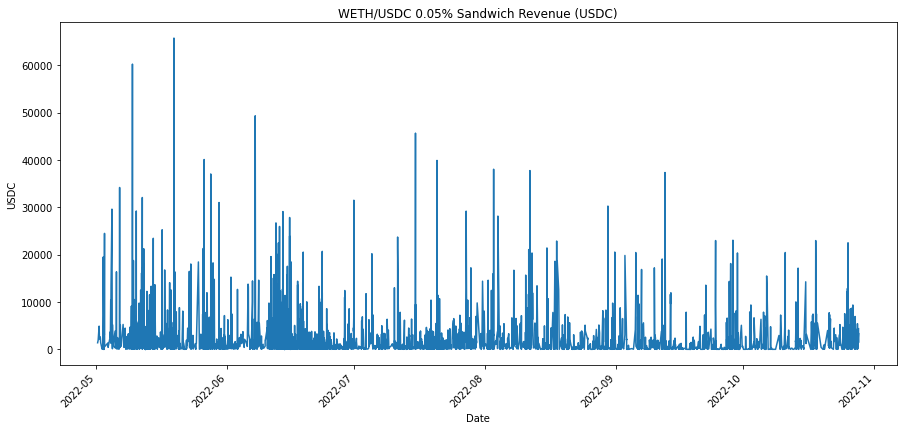

In [557]:
totalDf['Sandwich Revenue'].plot(
    figsize=(15,7),
    rot=45,
    title='WETH/USDC 0.05% Sandwich Revenue (USDC)',
    xlabel='Date',
    ylabel='USDC'
)

<AxesSubplot:title={'center':'WETH/USDC 0.05% Sandwich Profit (USDC)'}, xlabel='Date', ylabel='USDC'>

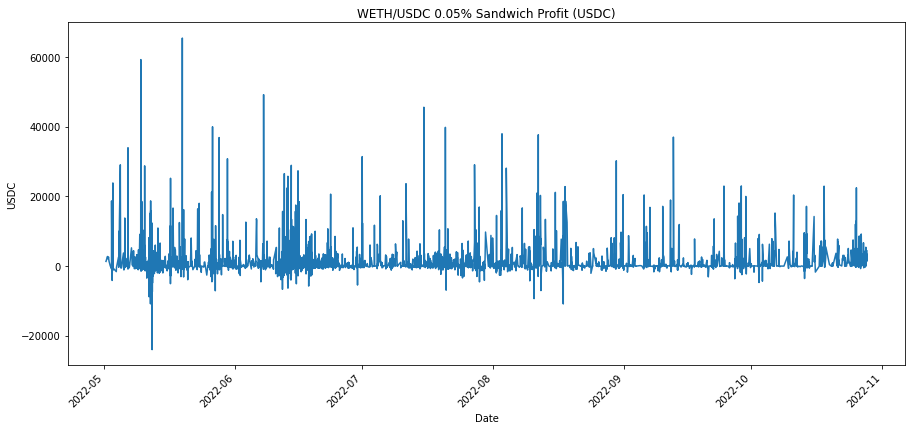

In [565]:
totalDf['Sandwich Profit'].plot(
    figsize=(15,7),
    rot=45,
    title='WETH/USDC 0.05% Sandwich Profit (USDC)',
    xlabel='Date',
    ylabel='USDC'
)

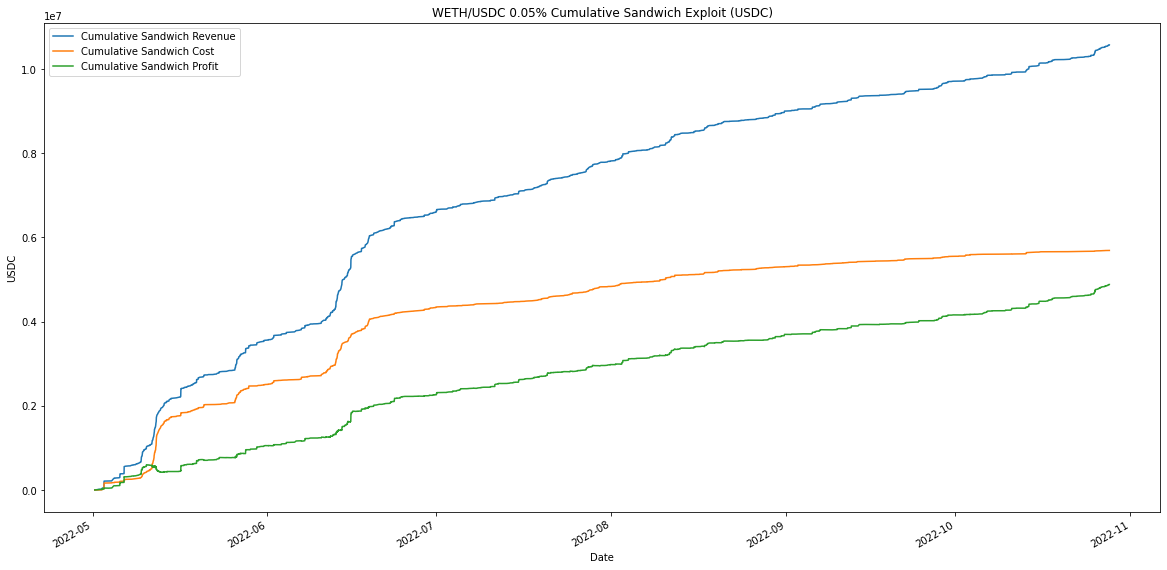

In [501]:
ax = totalDf[['Cumulative Sandwich Revenue',
              'Cumulative Sandwich Cost',
              'Cumulative Sandwich Profit']].plot(figsize=(20,10),
                                              title='WETH/USDC 0.05% Cumulative Sandwich Exploit (USDC)',
                                              xlabel='Date',
                                              ylabel='USDC')

## Q1: For all swaps, how many of them were sandwiched?

In [462]:
totalValidSwapCount = len(validSwaps)
totalAttackCount = len(totalDf)

attackRatio = totalAttackCount / totalValidSwapCount
attackRatio 

0.0034659280985241602

### Conclusion: 
<br> 0.3466% of the valid swaps were sandwiched

## Q2: Pre-Merge & Post-Merge, Is there any difference in Sandwich exploit?

In [464]:
theMergeBlockNumber = 15537393
theMergeTimestamp = validSwaps[validSwaps['block_number'] <= theMergeBlockNumber].iloc[-1]['block_time']

totalDf = pd.DataFrame.from_dict(totalProfit, orient='index')
totalDf.columns = ['sandwich Profit']

preMergeDf = totalDf[totalDf.index <= theMergeTimestamp]
postMergeDf = totalDf[totalDf.index > theMergeTimestamp] 

preMergeDf['cumulative sandwich Profit'] = preMergeDf['sandwich Profit'].cumsum()
postMergeDf['cumulative sandwich Profit'] = postMergeDf['sandwich Profit'].cumsum()

/var/folders/78/tjpvqbrx10g9y5084mq7ddw40000gn/T/ipykernel_71083/1323831127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preMergeDf['cumulative sandwich Profit'] = preMergeDf['sandwich Profit'].cumsum()
/var/folders/78/tjpvqbrx10g9y5084mq7ddw40000gn/T/ipykernel_71083/1323831127.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  postMergeDf['cumulative sandwich Profit'] = postMergeDf['sandwich Profit'].cumsum()


In [505]:
preMergeExploitCount = len(preMergeDf)
preMergeDataLength = ((preMergeDf.index[-1]-preMergeDf.index[0])/86400) 
preMergeCumExploit = preMergeDf['cumulative sandwich Profit'].iloc[-1] - preMergeDf['cumulative sandwich Profit'].iloc[0]

averageExploitCountPerDay = preMergeExploitCount / preMergeDataLength
averageExploitAmountPerAttack = preMergeCumExploit / preMergeExploitCount
averageExploitAmountPerDay = preMergeCumExploit / preMergeDataLength

print(f'pre-merge average sandwich happened {averageExploitCountPerDay} times per day')
print(f'pre-merge average sandwich exploited ${averageExploitAmountPerAttack} per attack')
print(f'pre-merge average sandwich exploited ${averageExploitAmountPerDay} per day')

pre-merge average sandwich happened 34.31937420500978 times per day
pre-merge average sandwich exploited $836.9250127295627 per attack
pre-merge average sandwich exploited $28722.742693398435 per day


In [506]:
postMergeExploitCount = len(postMergeDf)
postMergeDataLength = ((postMergeDf.index[-1]-postMergeDf.index[0])/86400) 
postMergeCumExploit = postMergeDf['cumulative sandwich Profit'].iloc[-1] - postMergeDf['cumulative sandwich Profit'].iloc[0]

averageExploitCountPerDay = postMergeExploitCount / postMergeDataLength
averageExploitAmountPerAttack = postMergeCumExploit / postMergeExploitCount
averageExploitAmountPerDay = postMergeCumExploit / postMergeDataLength

print(f'post-merge average sandwich happened {averageExploitCountPerDay} times per day')
print(f'pre-merge average sandwich exploited ${averageExploitAmountPerAttack} per attack')
print(f'post-merge average sandwich exploited ${averageExploitAmountPerDay} per day')

post-merge average sandwich happened 15.203959120325631 times per day
pre-merge average sandwich exploited $1463.4429315968878 per attack
post-merge average sandwich exploited $22250.12650692858 per day


### Conclusion: <br> 
The merge seems to have greatly reduced the frequency of sandwich attack, but exploited amount per attack has doubled 

## Q3: Sandwich Traders Analysis

In [507]:
totalDf = pd.DataFrame.from_dict(totalRevenue, orient='index')
totalDf.columns = ['Sandwich Revenue']
totalDf['Sandwich Cost'] = list(totalCost.values())
totalDf['Sandwich Profit'] = list(totalProfit.values())

totalDf['Cumulative Sandwich Revenue'] = totalDf['Sandwich Revenue'].cumsum()
totalDf['Cumulative Sandwich Cost'] = totalDf['Sandwich Cost'].cumsum()
totalDf['Cumulative Sandwich Profit'] = totalDf['Sandwich Profit'].cumsum()
totalDf['Sandwich Trader'] = list(sandwichTrader.values())
totalDf

,Sandwich Revenue,Sandwich Cost,Sandwich Profit,Cumulative Sandwich Revenue,Cumulative Sandwich Cost,Cumulative Sandwich Profit,Sandwich Trader
1651398123,1381.264908,73.743512,1307.521397,1.381265e+03,7.374351e+01,1.307521e+03,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1651409522,1938.606029,80.046081,1858.559948,3.319871e+03,1.537896e+02,3.166081e+03,0x3eadde4a48d0aebda37eed7076e736edac9a8b40
1651428773,4892.645474,2170.577667,2722.067807,8.212516e+03,2.324367e+03,5.888149e+03,0x3eadde4a48d0aebda37eed7076e736edac9a8b40
1651435488,2170.748728,100.435460,2070.313268,1.038327e+04,2.424803e+03,7.958462e+03,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
1651451191,2626.988371,77.282359,2549.706011,1.301025e+04,2.502085e+03,1.050817e+04,0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b
...,...,...,...,...,...,...,...
1666924703,2529.673391,60.749115,2468.924277,1.056317e+07,5.690550e+06,4.872618e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666926479,77.267911,26.680223,50.587688,1.056325e+07,5.690576e+06,4.872669e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666943291,3434.609646,18.736267,3415.873379,1.056668e+07,5.690595e+06,4.876084e+06,0x654fae4aa229d104cabead47e56703f58b174be4
1666943747,1404.531120,21.317761,1383.213359,1.056808e+07,5.690617e+06,4.877468e+06,0x7944e84d18803f926743fa56fb7a9bb9ba5f5f24


In [508]:
traderProfits = {}
traderTradeCount = {}
traderAverageProfit = {}
for trader in totalDf['Sandwich Trader'].unique():
    traderSanwichDf = totalDf[totalDf['Sandwich Trader'] == trader]
    traderProfit = traderSanwichDf['Sandwich Profit'].sum()
    traderProfits[trader] = traderProfit
    traderTradeCount[trader] = len(traderSanwichDf)
    traderAverageProfit[trader] = traderProfit / len(traderSanwichDf)

# traderProfits = dict(sorted(traderProfits.items(), key=lambda item: item[1],reverse=True))
traderDf = pd.DataFrame.from_dict(traderProfits, orient='index')
traderDf.columns = ['Sandwich Profit']
traderDf['Trade Count'] = list(traderTradeCount.values())
traderDf['Trader Average Profit'] = list(traderAverageProfit.values())
traderDf = traderDf.sort_values(by=['Sandwich Profit'],ascending=False)
traderDf.iloc[:20]

,Sandwich Profit,Trade Count,Trader Average Profit
0x7aa0426f10c7603bbfb8ceb8afb8d8c329ccfe8b,1.572026e+06,1211,1298.122157
0x3eadde4a48d0aebda37eed7076e736edac9a8b40,1.306687e+06,942,1387.141469
0x654fae4aa229d104cabead47e56703f58b174be4,7.560696e+05,222,3405.719078
0x73f7092510e44915cb177684db7b1f101aeecb8d,5.777718e+05,97,5956.409877
0xfac983fce7ef3cee8ffb2ceb967e1b2362aada00,3.279371e+05,91,3603.703958
0xa6ae57b1da8238cd149bc718c40578e4620b752c,2.364191e+05,153,1545.222666
0x4970197593ef5aed9d2c33409b953f5f9bb22563,1.410156e+05,302,466.938963
0x7944e84d18803f926743fa56fb7a9bb9ba5f5f24,1.104985e+05,99,1116.146635
0x68cc21f7c777243d1a9c71c2349bfdccd8ca7b78,1.087731e+05,80,1359.664359
0xb5eaac5a8649142dcdd13f981767913bcdf7ee42,1.048105e+05,96,1091.775743


In [518]:
# total unique trader count 
print(f'Unique Trader Count: {len(traderDf)}')

# profits from top 5 traders / profits from total profitable traders 
profitRatio = (traderDf['Sandwich Profit'][:5].sum()) / traderDf[traderDf['Sandwich Profit']>0]['Sandwich Profit'].sum()
print(f'Top 5 traders contributed to {round(100*profitRatio,2)}% of the total profits')

# percentage of all profitable traders 
profitTraderPercentage = len(traderDf[traderDf['Sandwich Profit']>0])/len(traderDf)
print(f'Profit Trader Percetage: {round(100*profitTraderPercentage,2)}%')

Unique Trader Count: 42
Top 5 traders contributed to 78.02% of the total profits
Profit Trader Percetage: 76.19%


### Conclusion: <br> 
Most traders are profitable, and the best ones among them accouted for most of the profits

## Q4: Profit Category 

In [575]:
PnLDict = {
    '<-10000':0,
    '-10000 ~ -1001':0,
    '-1000 ~ -101':0,
    '-100 ~ 0':0,
    '0 ~ 100':0,
    '101 ~ 1000':0,
    '1001 ~ 10000':0,
    '>10000':0
}

for profit in totalDf['Sandwich Profit']:
    if profit < -10000:
        PnLDict['<-10000'] += 1
    elif profit < -1000:
        PnLDict['-10000 ~ -1001'] += 1
    elif profit < -100:
        PnLDict['-1000 ~ -101'] += 1
    elif profit < 0:
        PnLDict['-100 ~ 0'] += 1
    elif profit < 100:
        PnLDict['0 ~ 100'] += 1
    elif profit < 1000:
        PnLDict['101 ~ 1000'] += 1
    elif profit < 10000:
        PnLDict['1001 ~ 10000'] += 1
    else:
        PnLDict['>10000'] += 1

PnLDict

{'<-10000': 5,
 '-10000 ~ -1001': 360,
 '-1000 ~ -101': 1717,
 '-100 ~ 0': 999,
 '0 ~ 100': 403,
 '101 ~ 1000': 669,
 '1001 ~ 10000': 1035,
 '>10000': 158}

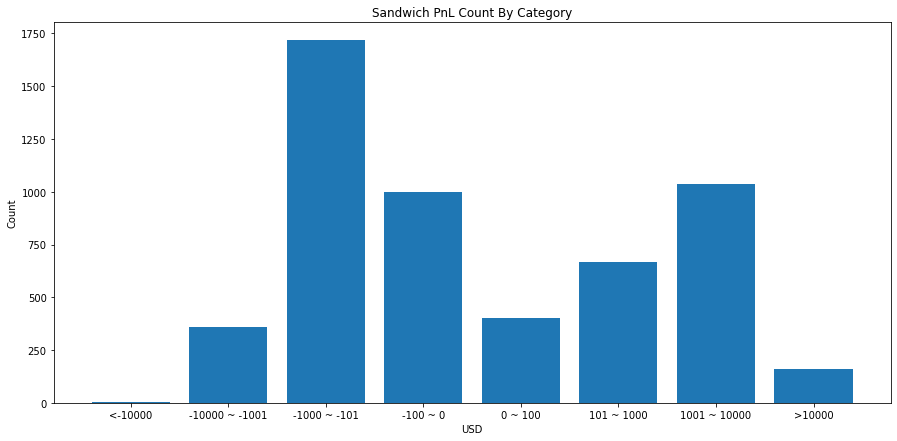

In [576]:
# plot 
keys = PnLDict.keys()
values = PnLDict.values()

fig = plt.figure(figsize =(15, 7))
 
# Horizontal Bar Plot
plt.bar(keys, values) 
plt.title('Sandwich PnL Count By Category')
plt.ylabel('Count')
plt.xlabel('USD')
# Show Plot
plt.show()

In [524]:
len(totalDf[totalDf['Sandwich Profit']>0])/len(totalDf)

0.42368125701459036

### Conclusion: <br> 
More than half of the trades lost money. However, they won big when the strategy played out

## Q5: Sandwich Count 

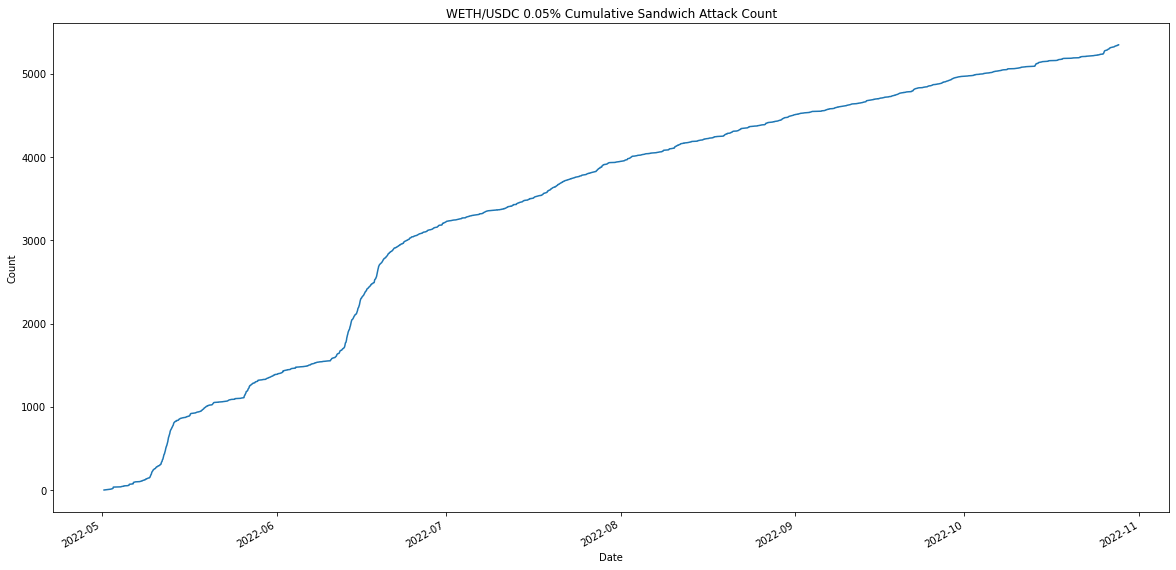

In [585]:
countList = list(i+1 for i in range(len(totalDf)))
totalDf['count'] = countList
ax = totalDf['count'].plot(figsize=(20,10),title='WETH/USDC 0.05% Cumulative Sandwich Attack Count',
                                              xlabel='Date',
                                              ylabel='Count')